## A small chaotic spiking network

In [2]:
using PyPlot, StaticArrays

In [9]:
# poincare section of chaotic network of three neurons
function spikingnet()
    
    # number of spikes in calculation
    nspikes = 10^7                           
    
    # define adjacency matrix
    topo = SMatrix{3,3}(0.<[0 0 0; 
                            1 0 1; 
                            0 1 0])
    
    # define effective coupling strength
    c = 1.0
    
    #initial network state
    œï = rand(3)   
    
    
    # initialize phase history
    ùöΩ = Float64[]
    
    tic()
    for s = 1:nspikes
        
        # find next spiking neuron j
        œïmax, j = findmax(œï)
        
        # calculate next spike time
        dt = œÄ/2 - œïmax
        
        # evolve phases till next spike time
        œï += dt
        
        # get postsynaptic neurons
        post = topo[:,j]               
        
        # update postsynaptic neurons (quadratic integrate and fire neuron)
        œï[post] = atan.(tan.(œï[post]) - c)  
        
        # reset spiking neuron
        œï[j] = -œÄ/2         
        
        # save neuron 2 & 3 whenever neuron 1 spikes
        j==1 && append!(ùöΩ,œï[2:3]) 
        
    end
    toc()
    
    plot(ùöΩ[1:2:end], ùöΩ[2:2:end],",k",ms=.01,alpha=0.01);axis("off")
    nothing
end

spikingnet (generic function with 1 method)

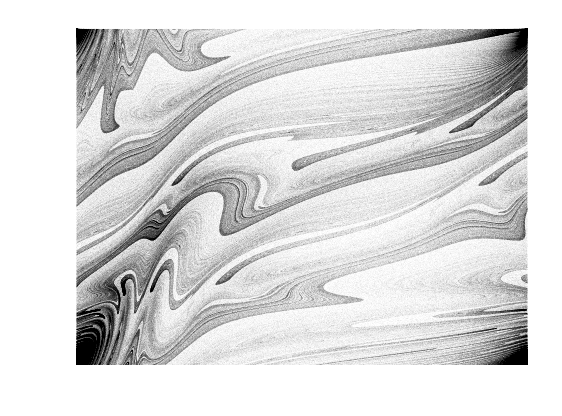

elapsed time: 4.799854874 seconds


In [10]:
# run network simulation of three spiking neurons and plot Poincare section
spikingnet()

### minimal spiking network

In [11]:
function fun()
n,œï,ùöΩ=SMatrix{3,3}(0.<[0 0 0;1 0 1;0 1 0]),randn(3),[]
for s=1:10^7
    m,j=findmax(œï)
    œï+=œÄ/2-m
    œï[n[:,j]],œï[j]=atan.(tan.(œï[n[:,j]])-1.),-œÄ/2
    j==1 && append!(ùöΩ,œï[2:3])
end
plot(ùöΩ[1:2:end],ùöΩ[2:2:end],",k",ms=.01,alpha=0.01);axis("off");
end

fun (generic function with 1 method)

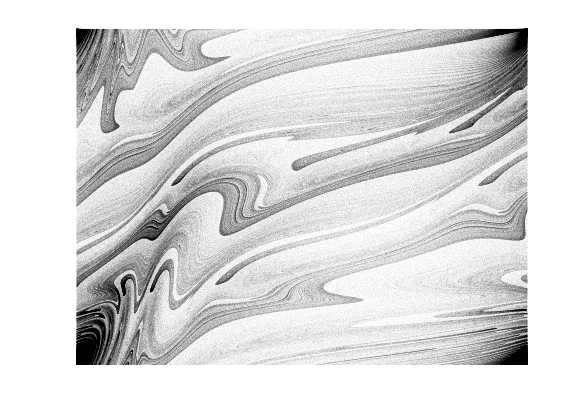

 11.419960 seconds (95.56 M allocations: 5.987 GiB, 31.48% gc time)


(-1.7278759400035655, 1.7278759295985675, -1.7278759563121535, 1.7278759129689445)

In [12]:
@time fun()

### minimal spiking network

In [13]:
function poincareFast(n,c)
srand(2)
    œï‚ÇÅ,œï‚ÇÇ,œï‚ÇÉ = rand(3)
    Œ¶‚ÇÇ = [œï‚ÇÇ]
    Œ¶‚ÇÉ = [œï‚ÇÉ]
    tic()
    for s = 1:n
        # find next spiking neuron
        if œï‚ÇÅ > œï‚ÇÇ
            if œï‚ÇÅ > œï‚ÇÉ
                # first neuron is spiking
                dt = œÄ/2 - œï‚ÇÅ
                # evolve phases till next spike time
                œï‚ÇÅ = -œÄ/2
                œï‚ÇÇ = atan(tan(œï‚ÇÇ + dt) - c)
                œï‚ÇÉ += dt
                push!(Œ¶‚ÇÇ,œï‚ÇÇ)
                push!(Œ¶‚ÇÉ,œï‚ÇÉ)
                continue
            end
        elseif œï‚ÇÇ > œï‚ÇÉ
            # second neuron is spiking
            dt = œÄ/2 - œï‚ÇÇ
            # evolve phases till next spike time
            œï‚ÇÅ += dt
            œï‚ÇÇ = -œÄ/2
            œï‚ÇÉ = atan(tan(œï‚ÇÉ + dt) - c)
            continue
        end
        # third neuron is spiking
        dt = œÄ/2 - œï‚ÇÉ
        # evolve phases till next spike time
        œï‚ÇÅ += dt
        œï‚ÇÇ = atan(tan(œï‚ÇÇ + dt) - c)
        œï‚ÇÉ = -œÄ/2
    end
    toc()
plot(Œ¶‚ÇÇ, Œ¶‚ÇÉ,",k",ms=.01,alpha=0.01); axis(.5*[-œÄ,œÄ,-œÄ,œÄ]);axis("off")
subplots_adjust(top=1,bottom=0,left=0,right=1);
end

poincareFast (generic function with 1 method)

elapsed time: 0.856503898 seconds
 

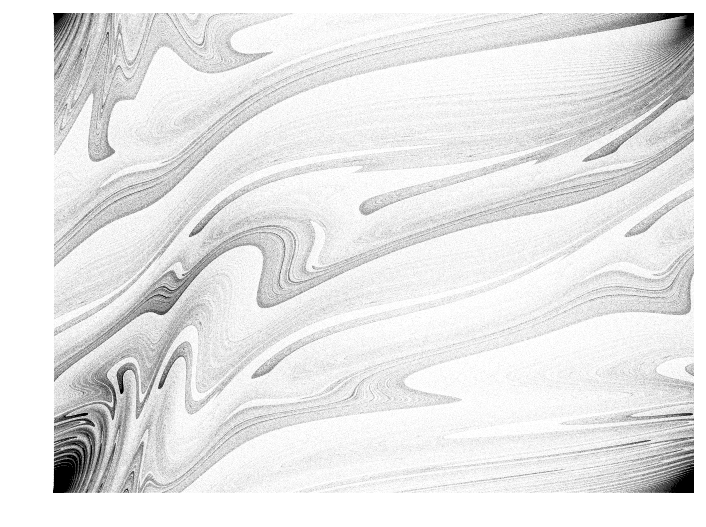

 0.999736 seconds (574 allocations: 66.029 MiB, 0.14% gc time)


In [19]:
gc();@time poincareFast(10^7,1.0)